# Advanced Calculus with SageMath - Chapter 6

## Surface Integrals and Flux

This notebook contains Chapter 6 from the main Advanced Calculus with SageMath notebook.

For the complete course, please refer to the main notebook: `Advanced Calculus with SageMath.ipynb`


In [3]:
# Comprehensive imports for advanced calculus
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp, odeint
import sympy as sp
from sympy import *
from sage.all import *
import seaborn as sns

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Advanced Calculus Environment Initialized")
print("Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib")
print("Ready for multivariable calculus, vector analysis, and PDEs!")

Advanced Calculus Environment Initialized
Tools: SageMath, NumPy, SciPy, SymPy, Matplotlib
Ready for multivariable calculus, vector analysis, and PDEs!


## Chapter 6: Surface Integrals and Flux

### Parametric Surfaces

A surface can be parameterized as $\vec{r}(u,v) = (x(u,v), y(u,v), z(u,v))$.

The normal vector is: $\vec{n} = \vec{r}_u \times \vec{r}_v$

Surface area element: $dS = |\vec{n}| \, du \, dv$

### Flux Through a Surface

The flux of vector field $\vec{F}$ through surface S is:
$$\iint_S \vec{F} \cdot \vec{n} \, dS$$

In [21]:
from IPython.display import display, Math
var('x y z u v')

print("SURFACE INTEGRALS AND FLUX")
print("=" * 50)

# Surface: upper hemisphere of radius 2
r_surface = vector([2*sin(u)*cos(v), 2*sin(u)*sin(v), 2*cos(u)])
display(Math(r"\text{Surface parameterization (upper hemisphere):}"))
display(Math(r"\vec{r}(u,v) = " + latex(r_surface)))
display(Math(r"0 \le u \le \pi/2,\; 0 \le v \le 2\pi"))

# Partials
r_u = vector([diff(c, u) for c in r_surface])
r_v = vector([diff(c, v) for c in r_surface])
display(Math(r"\vec{r}_u = " + latex(r_u)))
display(Math(r"\vec{r}_v = " + latex(r_v)))

# Normal (non-unit) and its magnitude
normal = r_u.cross_product(r_v)
normal_simplified = vector([c.simplify_full() for c in normal])
display(Math(r"\vec{n} = \vec{r}_u \times \vec{r}_v = " + latex(normal_simplified)))

normal_magnitude = sqrt(sum([c**2 for c in normal_simplified])).simplify_full()
display(Math(r"|\vec{n}| = " + latex(normal_magnitude)))
display(Math(r"dS = |\vec{n}|\,du\,dv"))

# Vector field F = (x,y,z)
F_field = vector([x, y, z])
display(Math(r"\vec{F}(x,y,z) = " + latex(F_field)))

# F on the surface
subs_map = {x: r_surface[0], y: r_surface[1], z: r_surface[2]}
F_on_surface = vector([comp.subs(subs_map) for comp in F_field])
display(Math(r"\vec{F}(\vec{r}(u,v)) = " + latex(F_on_surface)))

# Flux integrand: F · (r_u × r_v)
flux_integrand = (F_on_surface.dot_product(normal_simplified)).simplify_full()
display(Math(r"\vec{F}\cdot\vec{n} = " + latex(flux_integrand)))

# Integrate over hemisphere: u in [0, π/2], v in [0, 2π]
display(Math(r"\text{Computing } \iint_S \vec{F}\cdot\vec{n}\,dS"))
inner = integrate(flux_integrand, (u, 0, pi/2))
display(Math(r"\text{Inner integral (u): } " + latex(inner)))
flux_result = integrate(inner, (v, 0, 2*pi))
display(Math(r"\text{Flux through hemisphere: } " + latex(flux_result)))

# Optional check via Divergence Theorem (∇·F = 3)
check = 3 * (1/2) * (4/3)*pi*2^3
display(Math(r"\text{Divergence theorem check: } " + latex(check)))

SURFACE INTEGRALS AND FLUX


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

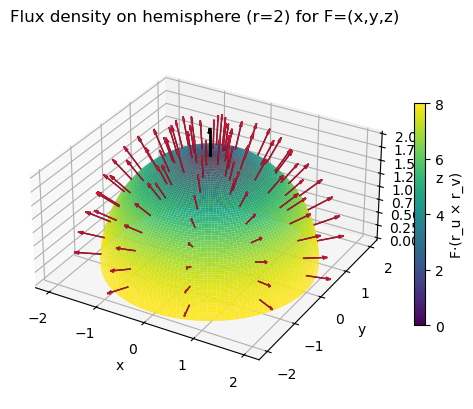

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Visualization: hemisphere (r=2), vector field F=(x,y,z), normals, and flux density F·(r_u×r_v)
R = 2.0
nu, nv = 80, 160
U, V = np.meshgrid(np.linspace(0, np.pi/2, nu), np.linspace(0, 2*np.pi, nv), indexing='ij')

# Surface points
X = R*np.sin(U)*np.cos(V)
Y = R*np.sin(U)*np.sin(V)
Z = R*np.cos(U)

# Tangent vectors
RU = np.stack([R*np.cos(U)*np.cos(V), R*np.cos(U)*np.sin(V), -R*np.sin(U)], axis=-1)
RV = np.stack([-R*np.sin(U)*np.sin(V), R*np.sin(U)*np.cos(V), np.zeros_like(U)], axis=-1)

# Outward (non-unit) normals and flux density
N = np.cross(RU, RV)
NX, NY, NZ = N[...,0], N[...,1], N[...,2]
flux_density = X*NX + Y*NY + Z*NZ  # F·(r_u × r_v)

# Plot surface colored by flux density
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
norm = plt.Normalize(vmin=flux_density.min(), vmax=flux_density.max())
colors = plt.cm.viridis(norm(flux_density))
ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, linewidth=0, antialiased=True, shade=False)

# Colorbar
mappable = plt.cm.ScalarMappable(norm=norm, cmap='viridis'); mappable.set_array(flux_density)
fig.colorbar(mappable, ax=ax, shrink=0.6, label='F·(r_u × r_v)')

# Sparse quivers: vector field F and outward normals
step_u, step_v = 8, 16
Xs, Ys, Zs = X[::step_u, ::step_v], Y[::step_u, ::step_v], Z[::step_u, ::step_v]
NXs, NYs, NZs = NX[::step_u, ::step_v], NY[::step_u, ::step_v], NZ[::step_u, ::step_v]
ax.quiver(Xs, Ys, Zs, Xs, Ys, Zs, length=0.5, normalize=True, color='k', arrow_length_ratio=0.2, linewidth=1.0, label='F')
ax.quiver(Xs, Ys, Zs, NXs, NYs, NZs, length=0.5, normalize=True, color='crimson', arrow_length_ratio=0.2, linewidth=1.0, alpha=0.8, label='n')

# Formatting
ax.set_title('Flux density on hemisphere (r=2) for F=(x,y,z)')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_box_aspect((np.ptp(X), np.ptp(Y), np.ptp(Z)))
plt.show()

---

## **Continuing Your Learning Journey**

You've completed **Surface Integrals and Flux**! The concepts you've mastered here form essential building blocks for what comes next.

**Ready for Stokes' Theorem?**

In Chapter 7, we'll build upon these foundations to explore even more fascinating aspects of the subject. The knowledge you've gained here will directly apply to the advanced concepts ahead.

### **What's Next**

Chapter 7 will expand your understanding by introducing new techniques and applications that leverage everything you've learned so far.

**[Continue to Chapter 7: Stokes' Theorem →](https://cocalc.com/share/public_paths/a1b8055d694cb5ffa034ce618d6df74434b00f1b)**

*or*

**[Return to Complete Course](https://cocalc.com/share/public_paths/ab3ad2f15d8989653377cbfdc238a82399b2633f)**